In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [24]:
crash_dataframe = pd.DataFrame({'rollovers' : np.random.randint(2, size = 100),
                                'speeding' : np.random.randint(2, size = 100)}
                              )
crash_dataframe.head()

,rollovers,speeding
0,0,1
1,1,0
2,1,0
3,1,1
4,0,0


In [25]:
crash_dataframe = crash_dataframe.assign(combined = lambda df : df['rollovers'].astype(str) + df['speeding'].astype(str))
crash_dataframe.head()

,rollovers,speeding,combined
0,0,1,01
1,1,0,10
2,1,0,10
3,1,1,11
4,0,0,00


In [26]:
set_builder = crash_dataframe.combined.value_counts()

In [27]:
set_builder.head()

01    32
11    27
10    21
00    20
Name: combined, dtype: int64

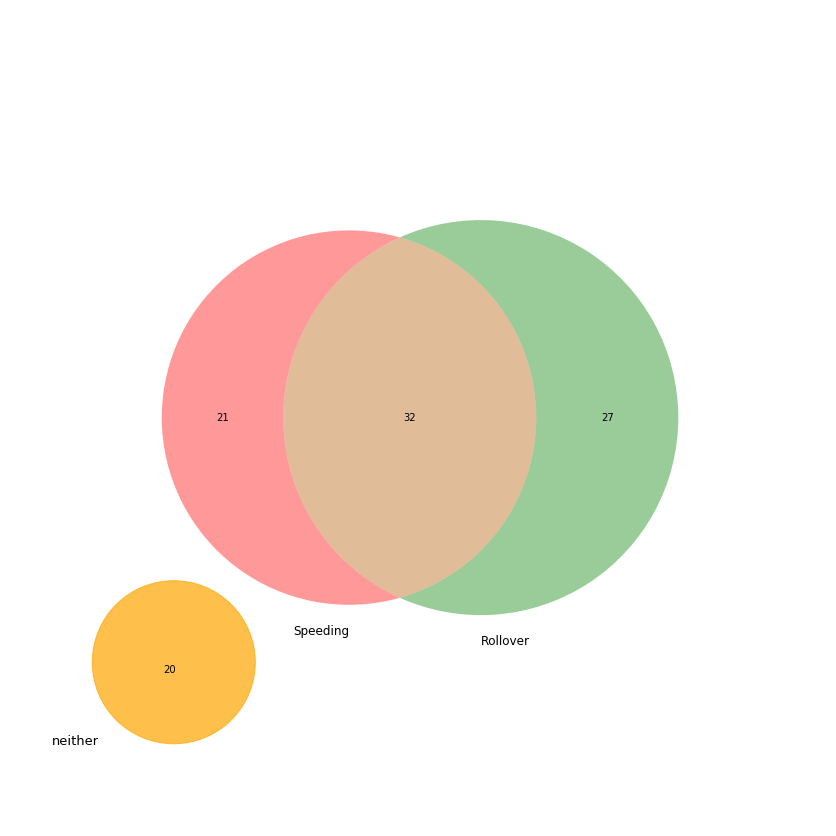

In [90]:
#venn2(subsets = (Ab,AB,aB)) A not b, AB, B not a
plt.figure(figsize=[15,15])

venn2(subsets = (set_builder.loc['10'], set_builder.loc['11'], set_builder.loc['01']), 
                set_labels = ('Speeding', 'Rollover'))

(plt.gcf()
    .gca()
    .add_artist(plt.Circle((-.6,-.6), 
                           radius = .2,
                           color='orange', 
                           alpha=.7))
)
plt.text(-.9,-.8, 
         s = 'neither',
         fontsize=13)
plt.text(-.625,-.625, 
         s = set_builder.loc['00'],
         fontsize=10)

plt.xlim([-1,1])
plt.ylim([-1,1])
 
plt.show();